# Machine learning example

We will try to predict scanned, low resolution, images of handwritten numbers, to their corresponding number.

In [2]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random

Loads a dataset with about **1800**, **8x8 pixel** image of **handwritten numbers**.

In [3]:
digits = datasets.load_digits()

**Inspecting** the data.

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
print(digits.data.shape)

(1797, 64)


Using **Matplotlib** to **visualize** some training examples.

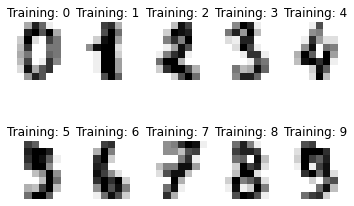

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Dividing the examples in the data set into a **training** and **test set**. Using a **70/30%** split.

In [8]:
num_examples = len(digits.data)
num_examples

1797

In [9]:
num_examples = len(digits.data)
num_examples

1797

In [10]:
num_split = int(0.7*num_examples)
num_split

1257

In [11]:
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
train_images = digits.images[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]
test_images = digits.images[num_split:]

In [12]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


# Part 4

Creating a **model** to be used as a **classifier**, in this case a **k-NN classifier**.

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

Print the predictions

In [14]:
predicted_labels = classifier.predict(test_features)
print("Prediction:", predicted_labels)

Prediction: [4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7
 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1
 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5
 7 9 5 4 1 8 4 9 0 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 9 2 0 1 2 6 3 3 7 3 3
 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 9 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4
 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 1 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 4 9 5 5 6 5 0 9 8 5 8 4 1 7 7 3 5
 1 0 0 0 2 7 8 2 0 1 2 6 3 3 7 7 8 4 6 6 6 7 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1
 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 3 5 8 4 5 0
 8 9 7 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5
 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 2 7 3 3 4 6 6 6 4 9 1
 5 0 9 5 2 8 

## Visualizing neighbors

In [24]:
(distances, neighbors) = classifier.kneighbors( test_features ) 
print('distances\n', distances, '\nneighbors\n', neighbors)

distances
 [[11.66190379 16.94107435 18.16590212 19.31320792 20.19900988]
 [21.09502311 21.47091055 21.61018278 21.74856317 21.81742423]
 [18.02775638 18.1934054  19.62141687 21.16601049 21.9317122 ]
 ...
 [20.83266666 21.70253441 22.93468988 24.0208243  25.63201124]
 [19.5192213  21.09502311 23.87467277 24.69817807 24.8394847 ]
 [26.73948391 27.62245463 27.73084925 27.80287755 27.92848009]] 
neighbors
 [[ 353  817  297  366 1254]
 [1177  588  725  824  328]
 [ 376  791  801  165  896]
 ...
 [ 148  248  242 1069  255]
 [ 254  251  849  417  199]
 [ 183  248 1015  513  224]]


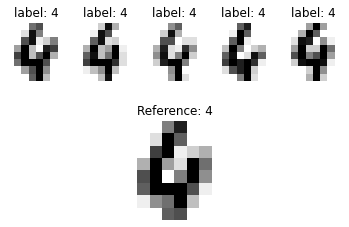

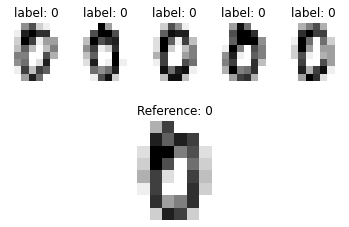

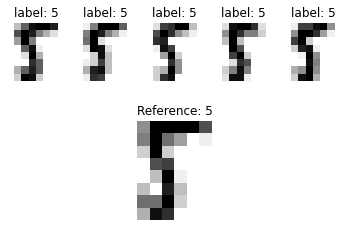

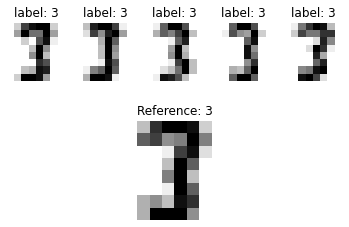

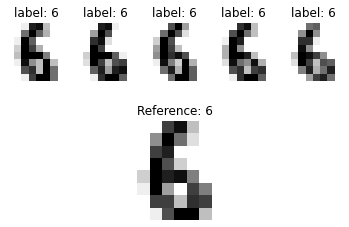

In [16]:
for n_ref in range(5):
    plt.subplots(2)

    plt.axis('off')
    plt.imshow(test_images[n_ref], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Reference: %i' % test_labels[n_ref])
    # print(neighbors[n_ref])

    for i in range(5):
        index = neighbors[n_ref][int(i)]
        # print("i", int(i), "index", index)
        image = train_images[index]
        label = train_labels[index]
        plt.subplot(2, 5, i+1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('label: %i' % label)
    

In [17]:
print("Classification matrix\n", metrics.classification_report( test_labels, predicted_labels) )
print("Confusion matrix\n", metrics.confusion_matrix( test_labels, predicted_labels))


Classification matrix
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540

Confusion matrix
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [

# Part 5

In [18]:
from sklearn.cluster import KMeans 
clustering = KMeans(n_clusters = 10)
clusters = clustering.fit(train_features)

In [19]:
predicted = clustering.predict(test_features)

In [20]:
print("Classification matrix\n", metrics.classification_report( test_labels, predicted) )
print("Confusion matrix\n", metrics.confusion_matrix( test_labels, predicted))

Classification matrix
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.47      0.66      0.55        53
           2       0.00      0.00      0.00        53
           3       0.80      0.77      0.79        53
           4       0.96      0.91      0.94        57
           5       0.00      0.00      0.00        56
           6       0.98      0.96      0.97        54
           7       0.00      0.00      0.00        54
           8       0.16      0.23      0.19        52
           9       0.00      0.00      0.00        55

    accuracy                           0.36       540
   macro avg       0.34      0.35      0.34       540
weighted avg       0.34      0.36      0.35       540

Confusion matrix
 [[ 0  0  0  0  1  0  0 52  0  0]
 [17 35  1  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  1  3 43]
 [ 0  5  3 41  0  3  0  0  1  0]
 [ 1  0  1  0 52  2  0  1  0  0]
 [ 0  0 36  0  1  0  1  0 18  0]
 [

In [21]:
print("completeness_score", metrics.completeness_score( test_labels, predicted))
print("homogeneity_score", metrics.homogeneity_score( test_labels, predicted))

completeness_score 0.7434921566289467
homogeneity_score 0.7321848324483357


In [22]:
clustering.cluster_centers_
#plt.plot(clustering.cluster_centers_)

array([[ 0.00000000e+00,  5.55111512e-17,  4.41176471e-02,
         1.97058824e+00,  1.14705882e+01,  1.21764706e+01,
         4.22058824e+00,  1.02941176e-01,  8.67361738e-19,
         7.35294118e-02,  1.50000000e+00,  8.57352941e+00,
         1.37058824e+01,  1.24852941e+01,  5.48529412e+00,
         1.61764706e-01,  4.33680869e-19,  9.41176471e-01,
         7.30882353e+00,  1.18382353e+01,  1.18529412e+01,
         1.28823529e+01,  3.97058824e+00,  1.02941176e-01,
         2.16840434e-19,  3.51470588e+00,  1.24852941e+01,
         1.29852941e+01,  1.43382353e+01,  1.29852941e+01,
         2.07352941e+00,  8.67361738e-19,  0.00000000e+00,
         2.23529412e+00,  8.42647059e+00,  9.58823529e+00,
         1.32647059e+01,  1.16029412e+01,  1.39705882e+00,
         0.00000000e+00,  3.46944695e-18,  9.70588235e-01,
         2.76470588e+00,  5.08823529e+00,  1.26764706e+01,
         1.12352941e+01,  7.50000000e-01, -1.73472348e-18,
         3.46944695e-18,  4.41176471e-02,  4.26470588e-0